## Lab  4
## Network metrics

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Erdos-Renyi model

In [2]:
# list of number of nodes
n_er = [5, 10, 30, 50, 100, 300, 500, 1000, 2000, 5000, 11000]#, 150000, 300000, 500000, 1100000]

# epsilon (chosen)
eps = 0.8

# calculating the treshold probabilities, with which the graph is most likely connected
tr = []
for num in n_er:
    t = ((1 + eps) * np.log(num)) / num
    tr.append(t)

In [3]:
# calculating the shortest paths for the vector of number of nodes
sp_er = []

for i in range(len(n_er)):
    eg = nx.fast_gnp_random_graph(n_er[i], tr[i]+0.0000001) #treshhold probability and a bit more - for it to be surely connected
    avg_path = nx.average_shortest_path_length(eg)
    
    print("Number of nodes = " + str(n_er[i]))
    print("Average shortest path = " + str(avg_path))
    print("__________")
    sp_er.append(avg_path)

Number of nodes = 5
Average shortest path = 1.6
__________
Number of nodes = 10
Average shortest path = 1.73333333333
__________
Number of nodes = 30
Average shortest path = 2.03908045977
__________
Number of nodes = 50
Average shortest path = 2.25632653061
__________
Number of nodes = 100
Average shortest path = 2.43555555556
__________
Number of nodes = 300
Average shortest path = 2.74289855072
__________
Number of nodes = 500
Average shortest path = 2.82993186373
__________
Number of nodes = 1000
Average shortest path = 2.99774974975
__________
Number of nodes = 2000
Average shortest path = 3.17184342171
__________
Number of nodes = 5000
Average shortest path = 3.43105725145
__________
Number of nodes = 11000
Average shortest path = 3.61930320938
__________


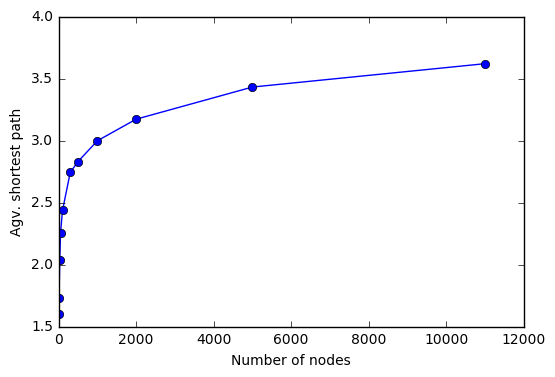

In [4]:
plt.plot(n_er, sp_er, '-o')
plt.xlabel('Number of nodes')
plt.ylabel('Agv. shortest path')

plt.show()

## Watts-Strogatz model

In [5]:
# setting a vector of rewiring probabilities and a fixed number of nodes

prob_ws = [0.00001,0.0001,0.0005,0.001,0.003,0.005,0.01,0.025,0.05,0.1,0.25,0.5,0.8,1]
nodes = 600

In [6]:
# calculating normalization variables

g_null = nx.watts_strogatz_graph(nodes, 5, 0)
norm_clust = nx.average_clustering(g_null)
norm_sp = nx.average_shortest_path_length(g_null)

In [7]:
# calculating vectors of clustering coefficients and shortest paths for
# each of the probabilities

clust = []
sp_ws = []

for i in range(len(prob_ws)):
    g = nx.watts_strogatz_graph(nodes, 5, prob_ws[i])
    avg_clust = nx.average_clustering(g)
    avg_short_lenght = nx.average_shortest_path_length(g)
    
    clust.append(avg_clust/norm_clust)
    sp_ws.append(avg_short_lenght/norm_sp)
    
    print(str(i) + "/" + str(len(prob_ws)-1))
    print("Rewiring probability = " + str(prob_ws[i]))
    print("Average clustering = " + str(avg_clust/norm_clust))
    print("Average shortest path = " + str(avg_short_lenght/norm_sp))
    print("___________")


0/13
Rewiring probability = 1e-05
Average clustering = 1.0
Average shortest path = 1.0
___________
1/13
Rewiring probability = 0.0001
Average clustering = 1.0
Average shortest path = 1.0
___________
2/13
Rewiring probability = 0.0005
Average clustering = 0.996555555556
Average shortest path = 0.758739387228
___________
3/13
Rewiring probability = 0.001
Average clustering = 0.990666666667
Average shortest path = 0.600502473237
___________
4/13
Rewiring probability = 0.003
Average clustering = 0.997555555556
Average shortest path = 0.610998375784
___________
5/13
Rewiring probability = 0.005
Average clustering = 0.993111111111
Average shortest path = 0.616712070875
___________
6/13
Rewiring probability = 0.01
Average clustering = 0.983777777778
Average shortest path = 0.468217940199
___________
7/13
Rewiring probability = 0.025
Average clustering = 0.904444444444
Average shortest path = 0.172359616094
___________
8/13
Rewiring probability = 0.05
Average clustering = 0.846111111111
Averag

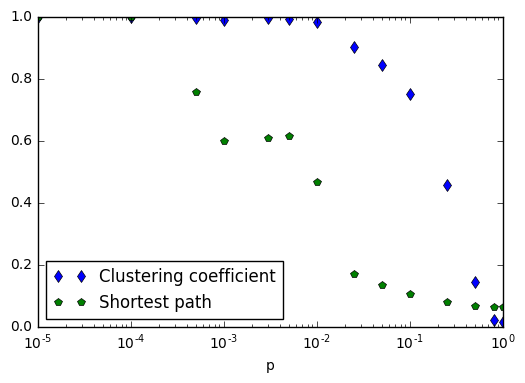

In [8]:
# making a pretty plot

pl1, = plt.plot(prob_ws, clust, 'd')
pl2, = plt.plot(prob_ws, sp_ws, 'p', label='l')
plt.legend([pl1, pl2], ['Clustering coefficient','Shortest path'], loc='lower left')
plt.xlabel('p')
plt.xscale('log')
plt.show()